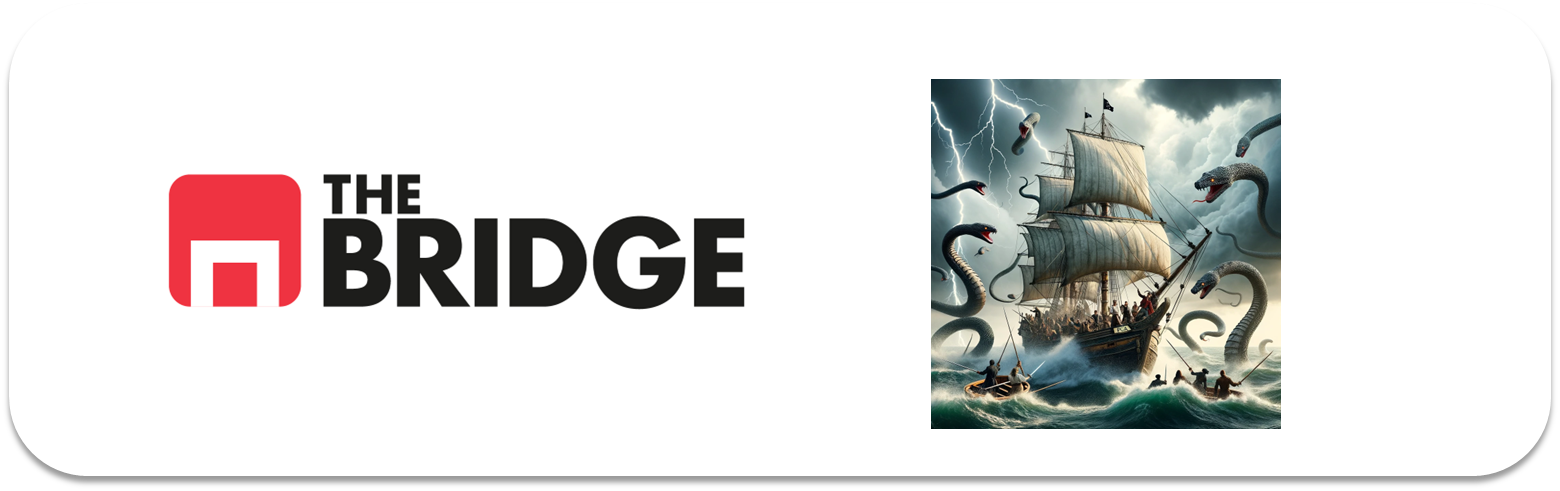

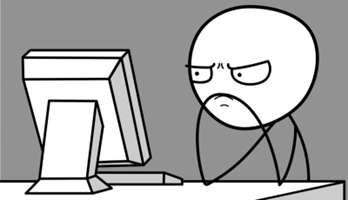

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [145]:
df = pd.read_csv('./data/breastcancer-winsconsin.csv')
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [147]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [148]:
target = 'diagnosis'

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [149]:
df.drop(columns = ['Unnamed: 32', 'id'], axis = 1, inplace = True)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [150]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 33)

In [151]:
train_set[target].value_counts(normalize = True)

diagnosis
B    0.628571
M    0.371429
Name: proportion, dtype: float64

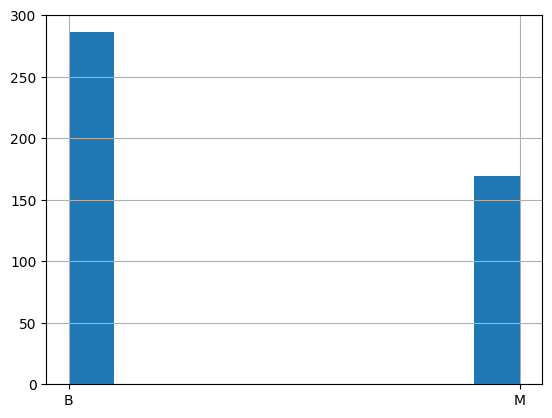

In [152]:
train_set[target].hist();

La variable target está un poco desbalanceada

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [153]:
features = train_set.columns.to_list()
features.remove(target)

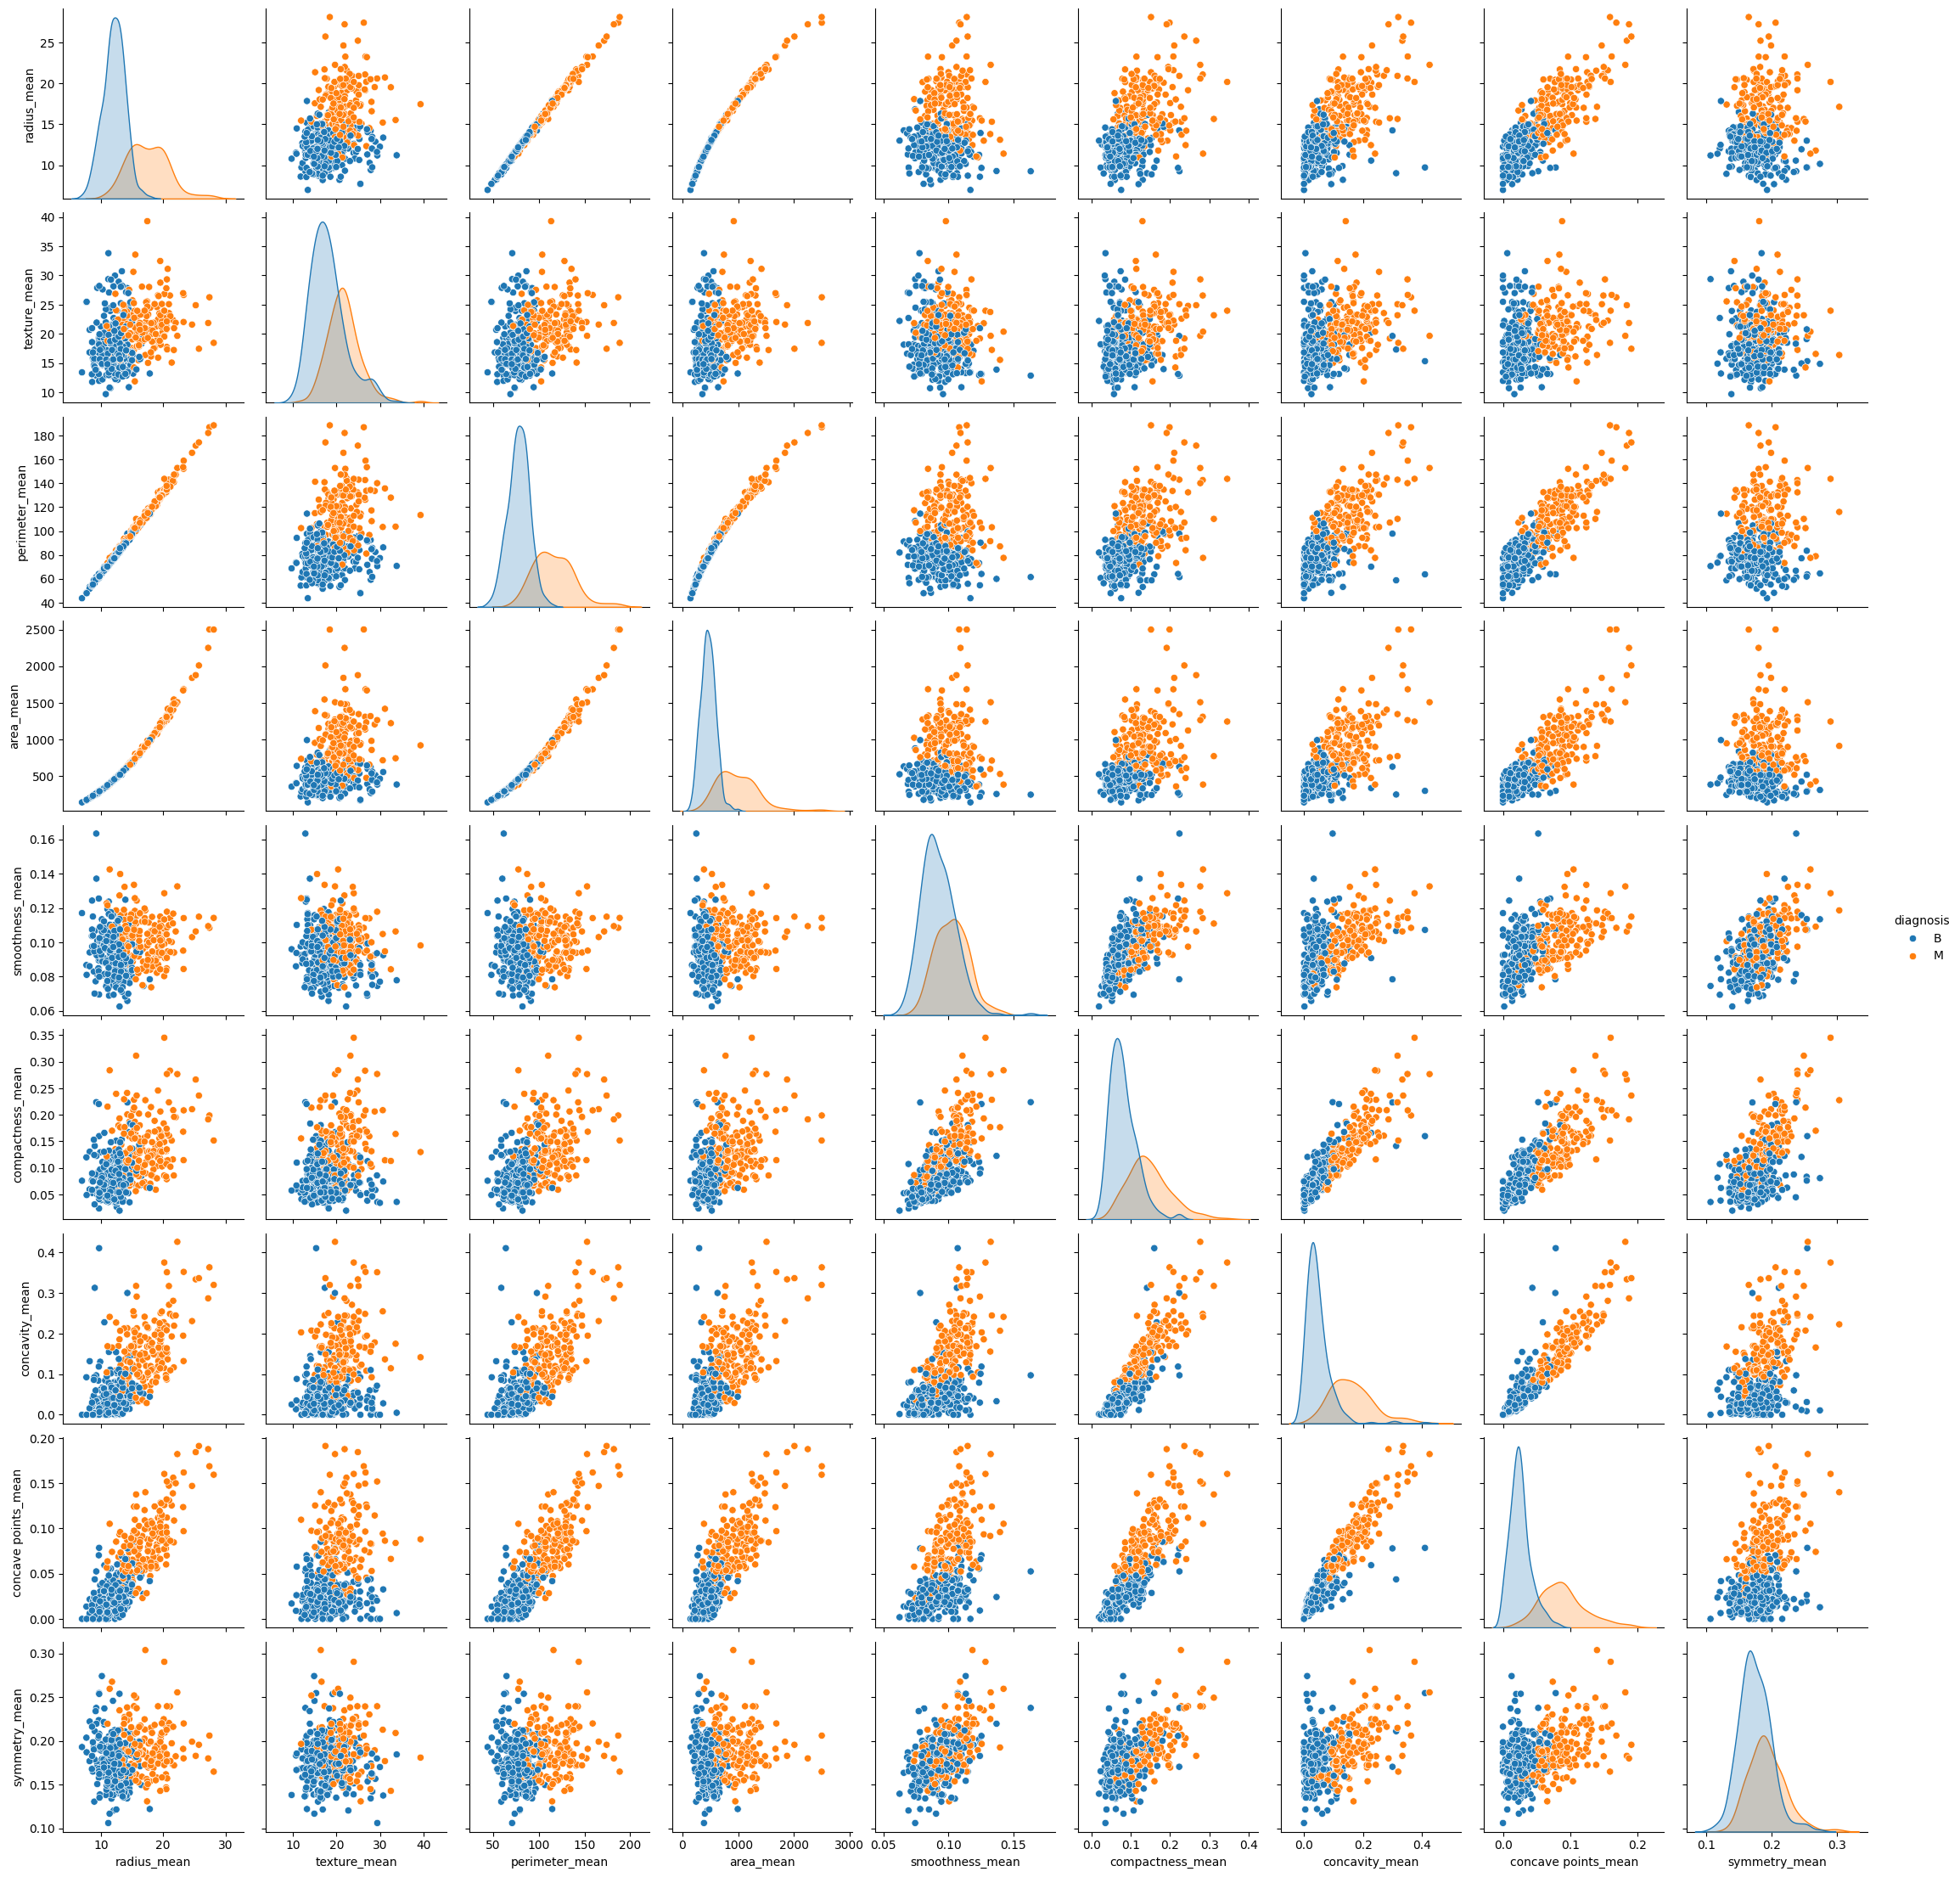

In [154]:
sns.pairplot(data=train_set.iloc[:, :10], hue=target);

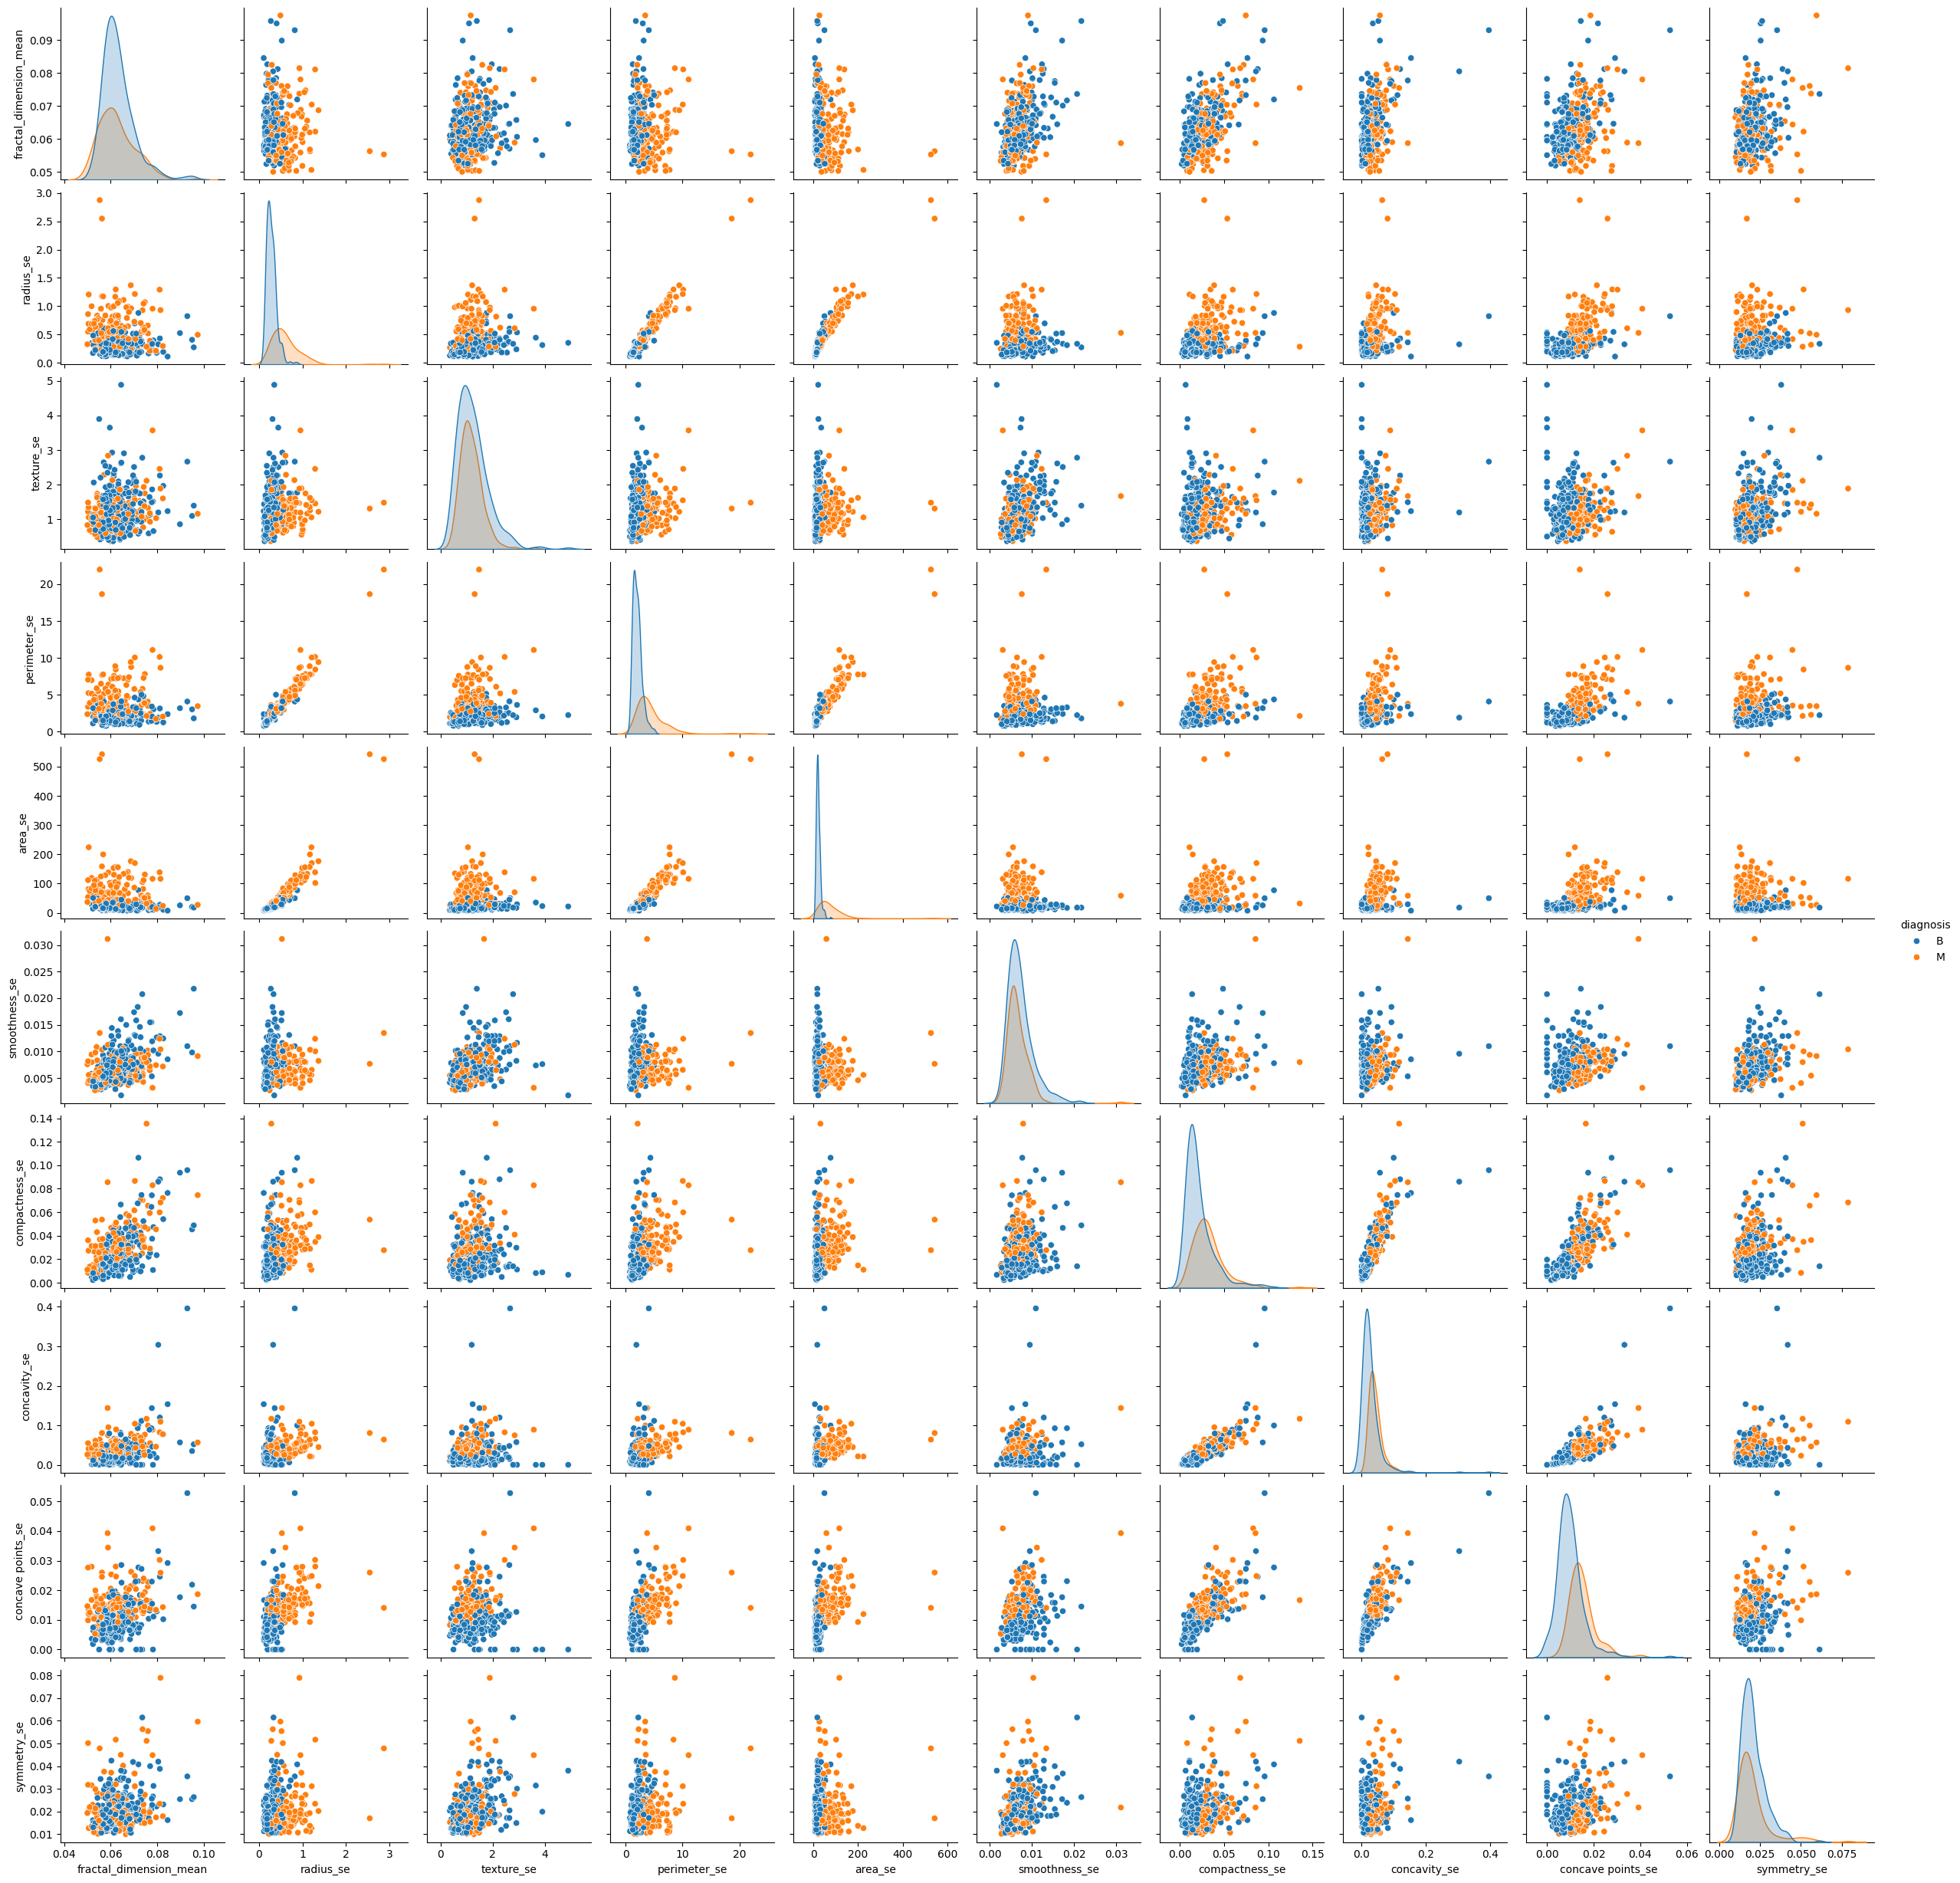

In [155]:
cols = train_set.columns[10:20]
sns.pairplot(data=train_set[list(cols) + [target]], hue=target);

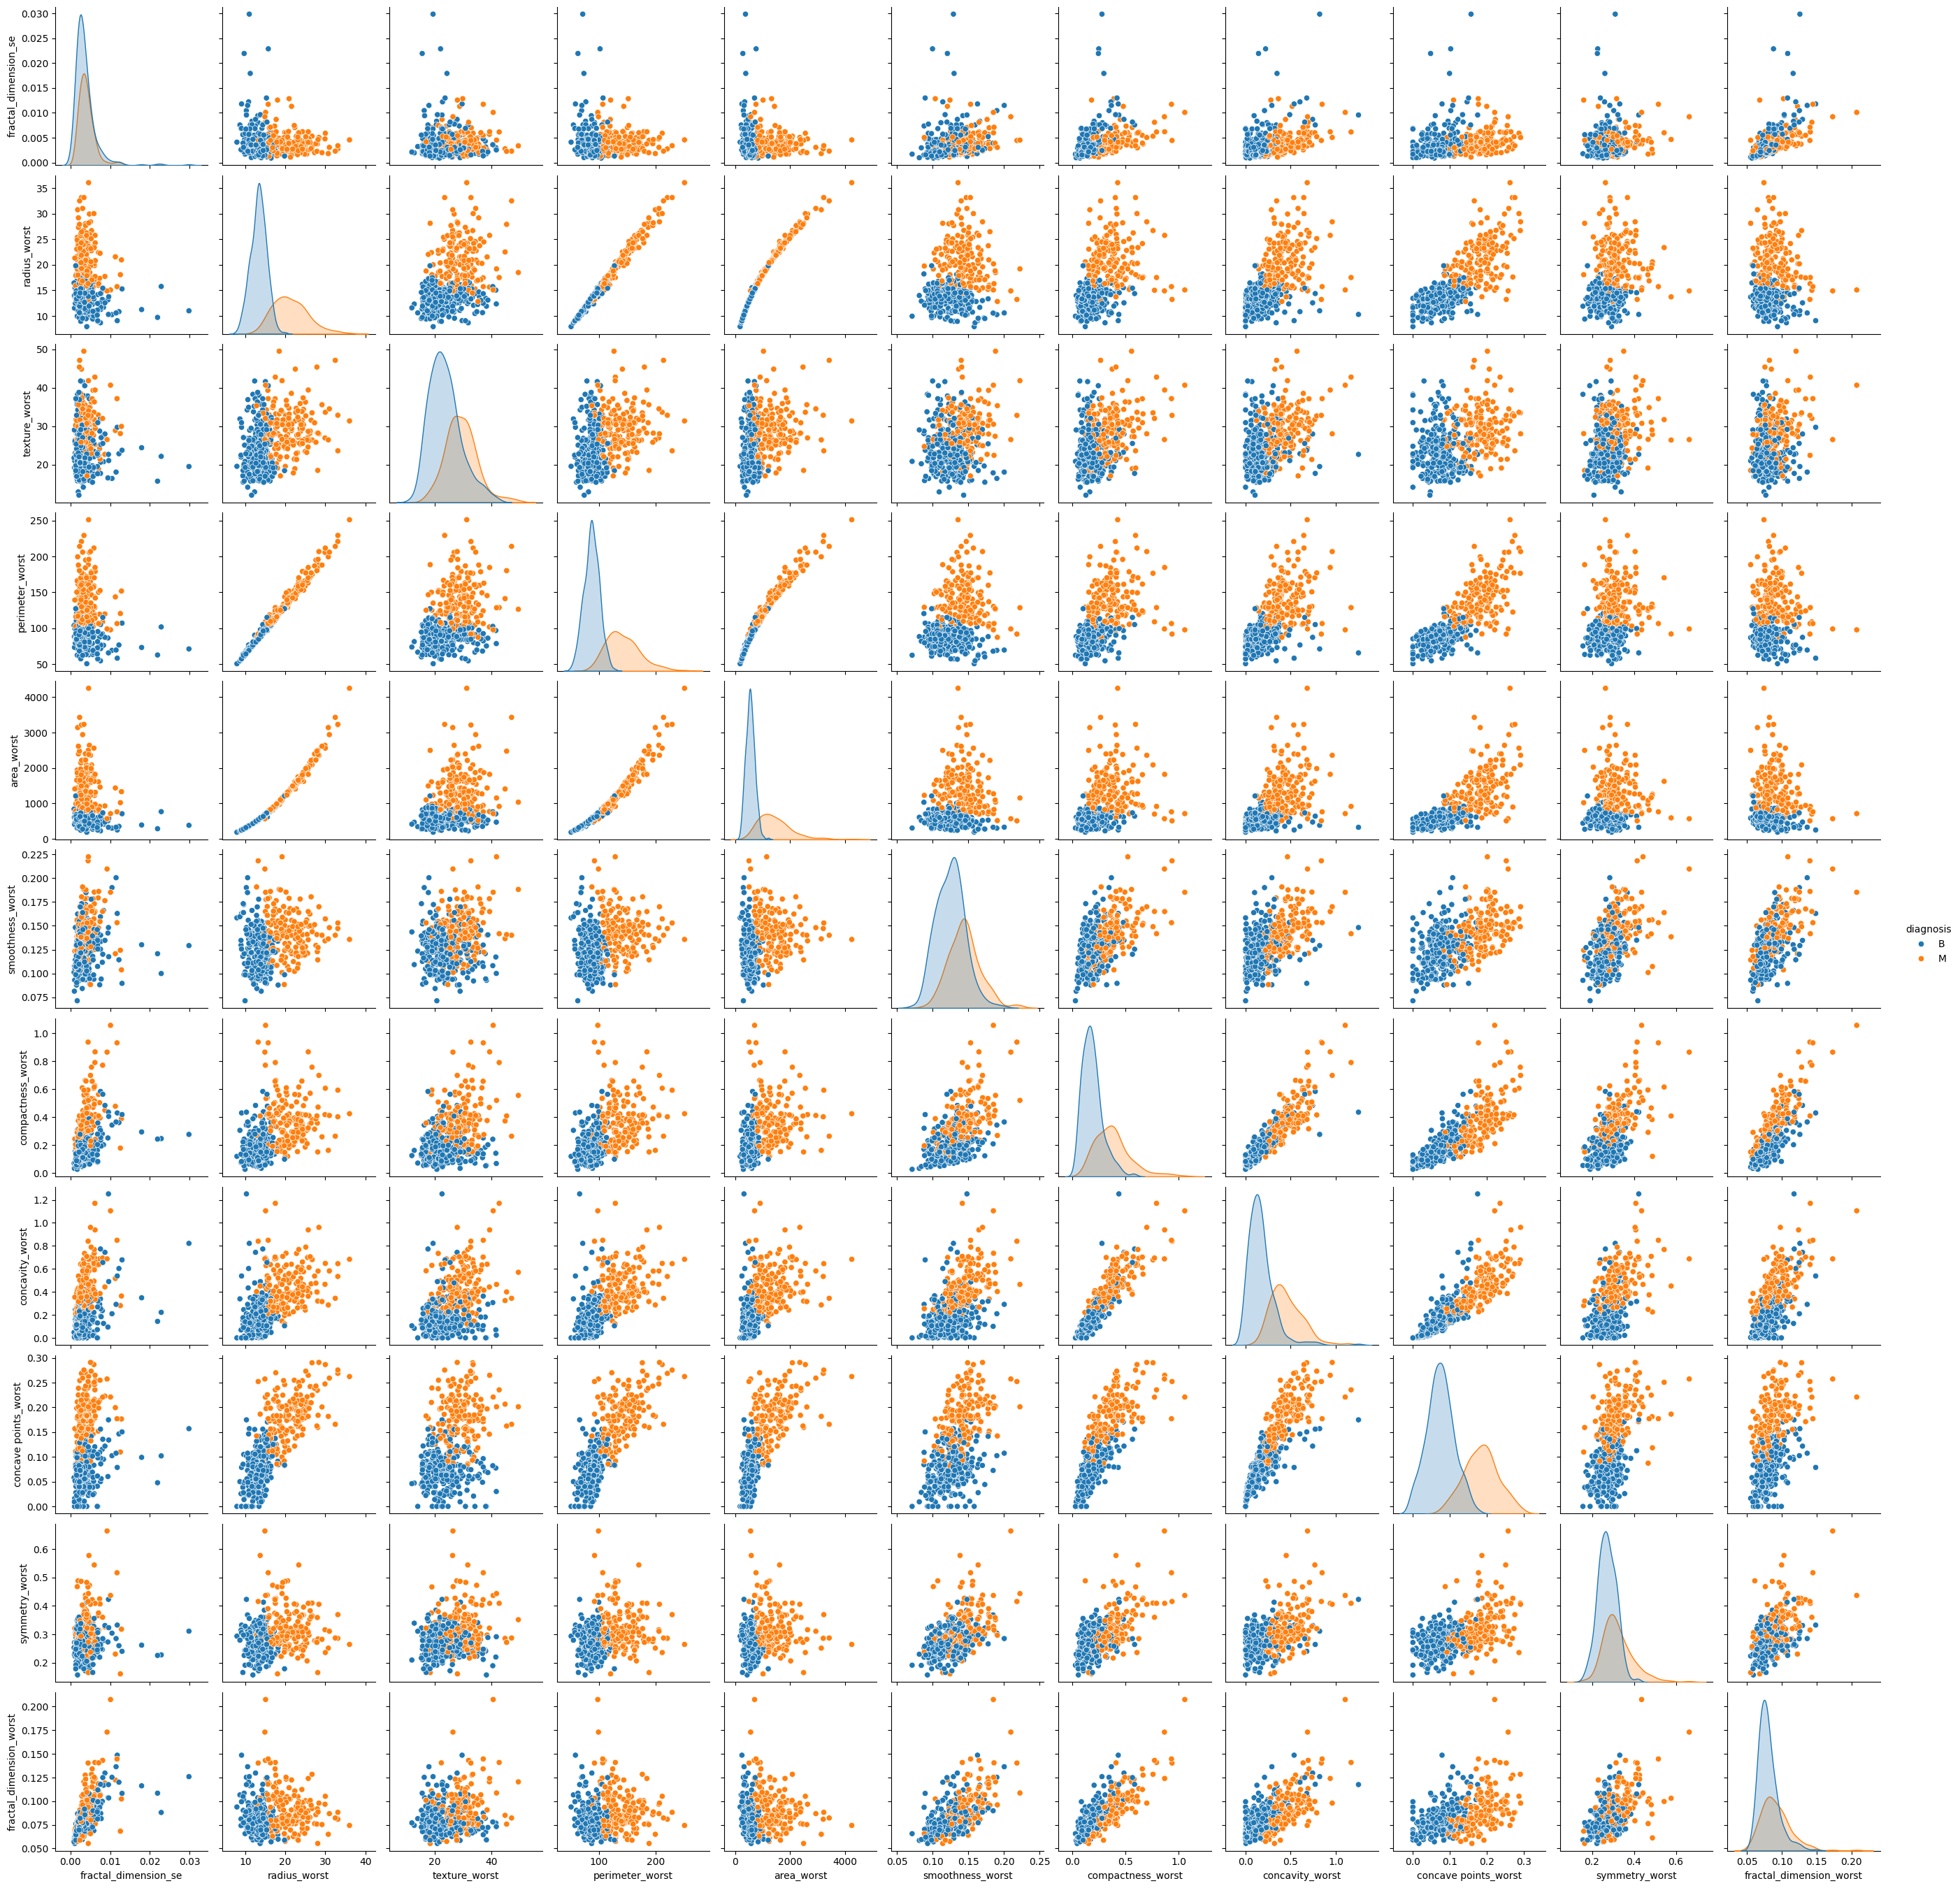

In [156]:
cols = train_set.columns[20:]  
sns.pairplot(data=train_set[list(cols) + [target]], hue=target);

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [157]:
encoder = OrdinalEncoder()
train_set[target] = encoder.fit_transform(train_set[[target]])
test_set[target] = encoder.transform(test_set[[target]])

In [158]:
corr = train_set.corr()
corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.739665      0.401708        0.751892   
radius_mean               0.739665     1.000000      0.333248        0.997867   
texture_mean              0.401708     0.333248      1.000000        0.339945   
perimeter_mean            0.751892     0.997867      0.339945        1.000000   
area_mean                 0.715381     0.986838      0.326735        0.986140   
smoothness_mean           0.361844     0.147735     -0.031280        0.185256   
compactness_mean          0.602624     0.502259      0.248898        0.552854   
concavity_mean            0.696110     0.666239      0.317880        0.705443   
concave points_mean       0.785074     0.822382      0.301322        0.850821   
symmetry_mean             0.322897     0.132051      0.074111        0.166722   
fractal_dimension_mean   -0.036145    -0.327066     -0.084729       -0.277190   
radius_se                 0.560639     0.682959      0.270885        0.696097   
texture_se               -0.046896    -0.126591      0.371543       -0.116927   
perimeter_se              0.544953     0.677915      0.277181        0.697093   
area_se                   0.535939     0.728424      0.256914        0.737623   
smoothness_se            -0.098078    -0.276059     -0.009054       -0.257462   
compactness_se            0.285302     0.180175      0.187338        0.224909   
concavity_se              0.232067     0.163005      0.139333        0.195822   
concave points_se         0.406353     0.373096      0.151123        0.404904   
symmetry_se              -0.015623    -0.123801     -0.010658       -0.102256   
fractal_dimension_se      0.052317    -0.074687      0.042300       -0.038811   
radius_worst              0.783912     0.970490      0.361311        0.970409   
texture_worst             0.446215     0.304041      0.911125        0.310635   
perimeter_worst           0.789106     0.967006      0.368902        0.972001   
area_worst                0.738231     0.940713      0.350922        0.941261   
smoothness_worst          0.410862     0.090782      0.062709        0.121631   
compactness_worst         0.590662     0.409014      0.289719        0.451140   
concavity_worst           0.653181     0.516296      0.318915        0.552987   
concave points_worst      0.800563     0.742050      0.300272        0.768961   
symmetry_worst            0.407719     0.154494      0.092415        0.179184   
fractal_dimension_worst   0.300674    -0.012836      0.115667        0.030941   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.715381         0.361844          0.602624   
radius_mean               0.986838         0.147735          0.502259   
texture_mean              0.326735        -0.031280          0.248898   
perimeter_mean            0.986140         0.185256          0.552854   
area_mean                 1.000000         0.157433          0.494787   
smoothness_mean           0.157433         1.000000          0.668622   
compactness_mean          0.494787         0.668622          1.000000   
concavity_mean            0.675540         0.525468          0.879114   
concave points_mean       0.822045         0.543322          0.833855   
symmetry_mean             0.137487         0.555806          0.592361   
fractal_dimension_mean   -0.296173         0.596395          0.558498   
radius_se                 0.738415         0.291263          0.494353   
texture_se               -0.095897         0.006024          0.016081   
perimeter_se              0.733311         0.284034          0.540530   
area_se                   0.796019         0.228536          0.439637   
smoothness_se            -0.218698         0.307915          0.102546   
compactness_se            0.187251         0.334025          0.733989   
concavity_se              0.177141         0.252412          0.544056   
concave points_se         0.368631         0.

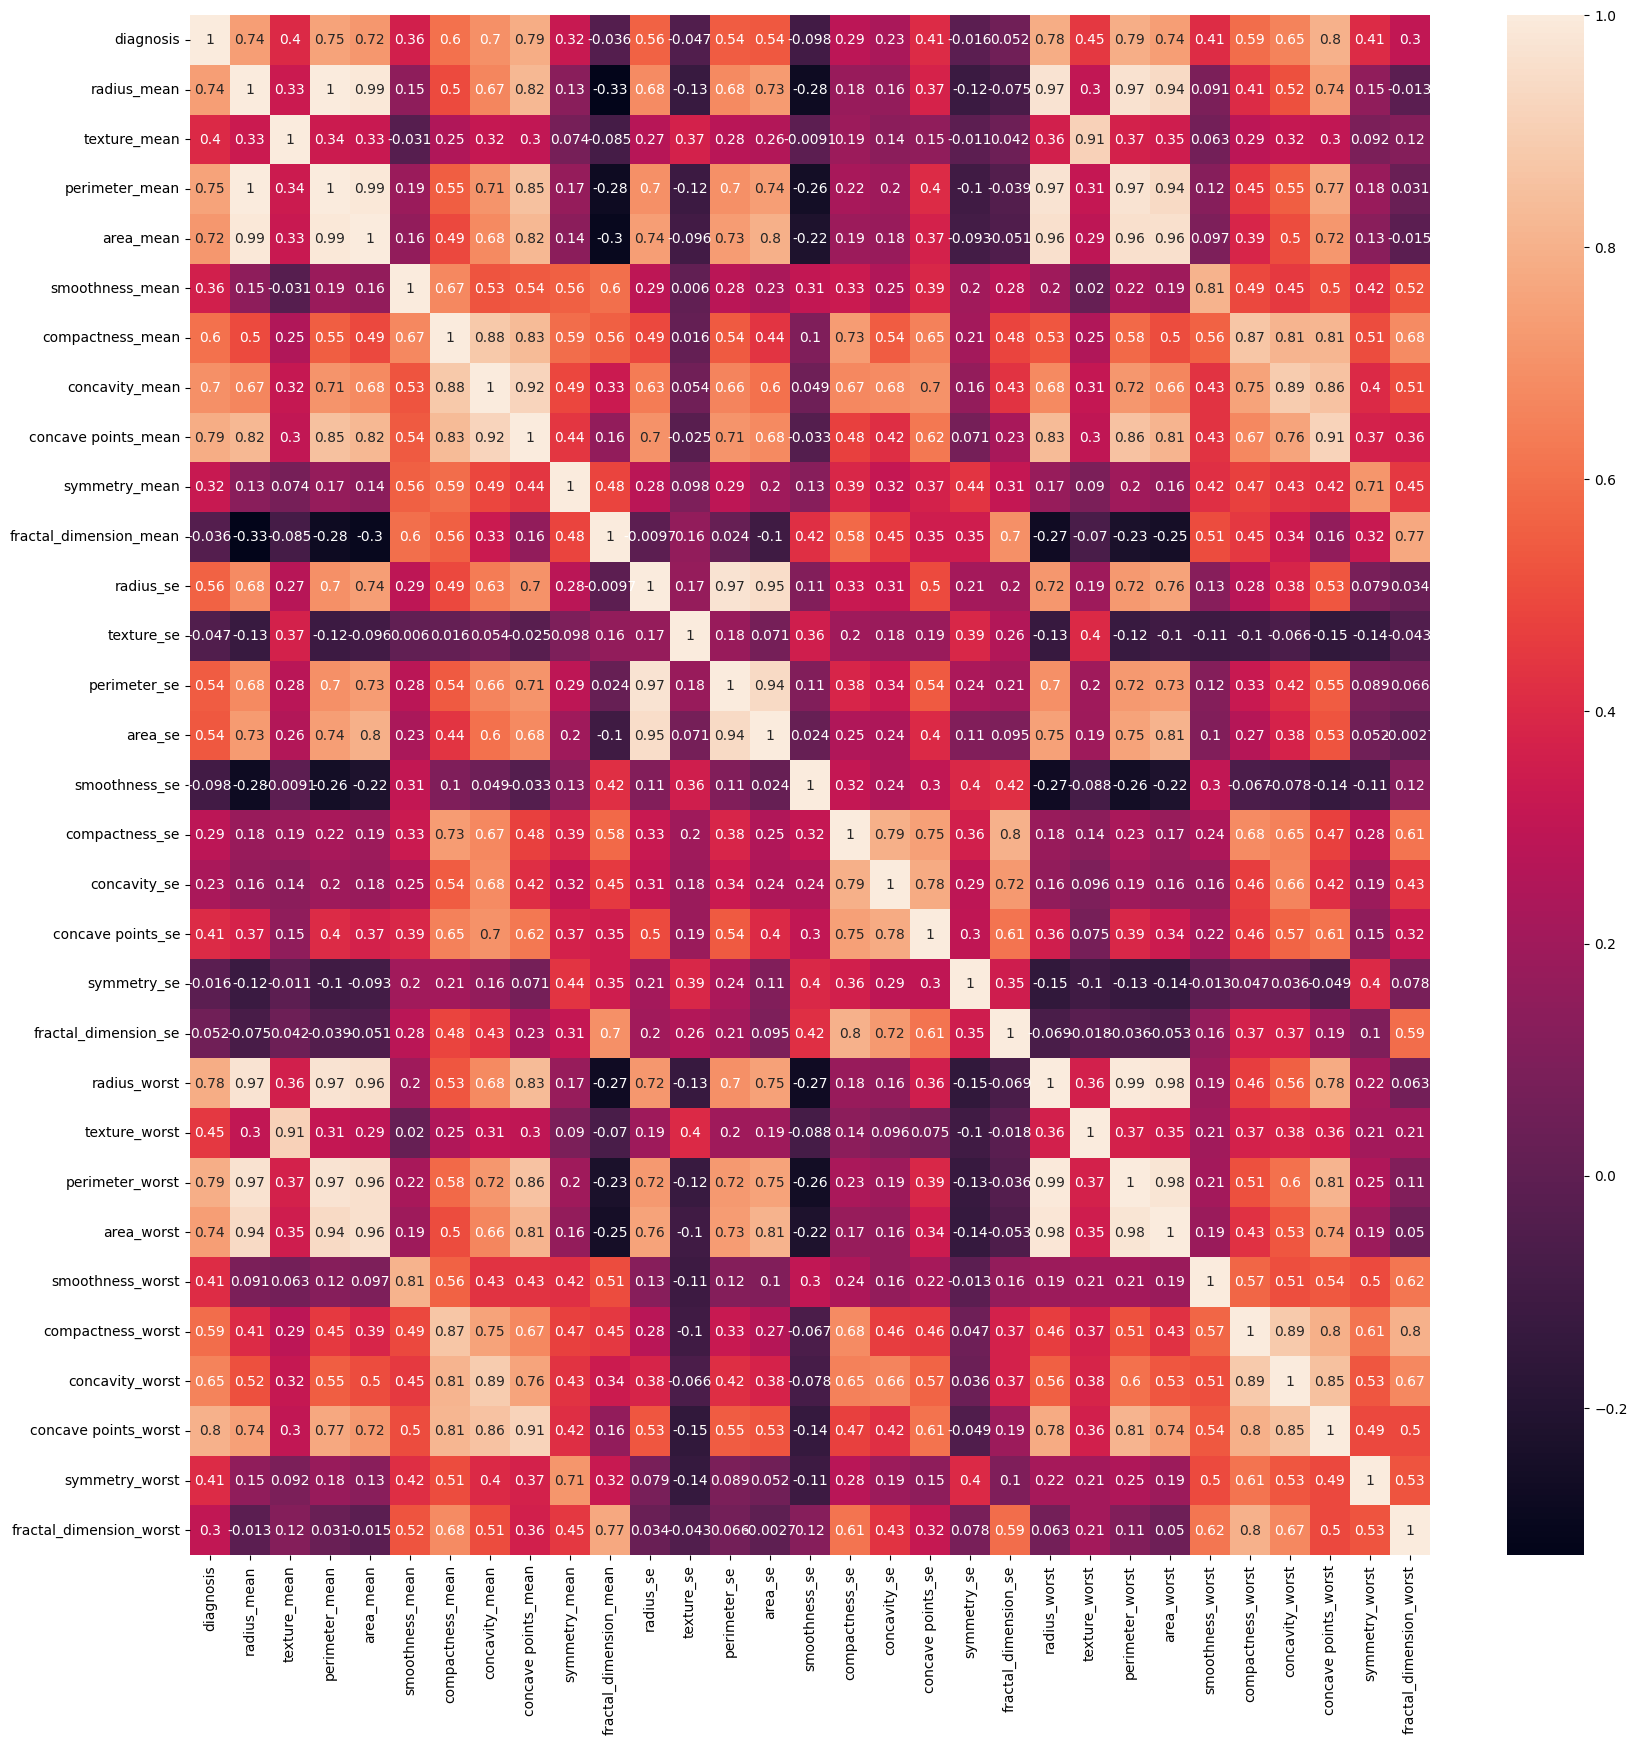

In [159]:
corr = train_set.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data = corr, annot=True)

plt.show()

Se podrían eliminar aquellas que tienen una alta ``colinealidad`` entre ellas

In [160]:
criterio = 0.75
features = train_set.columns.to_list()
features_colinealidad = []

for col in features:
    add_col = True  # Variable para determinar si la columna se debe agregar
    for corr_col in features:
        if col != corr_col and abs(corr.loc[col, corr_col]) >= criterio:
            add_col = False
            break  # Si la correlación es alta, dejamos de evaluar esa columna
    if add_col:
        features_colinealidad.append(col)

print(features_colinealidad)

['symmetry_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'symmetry_worst']


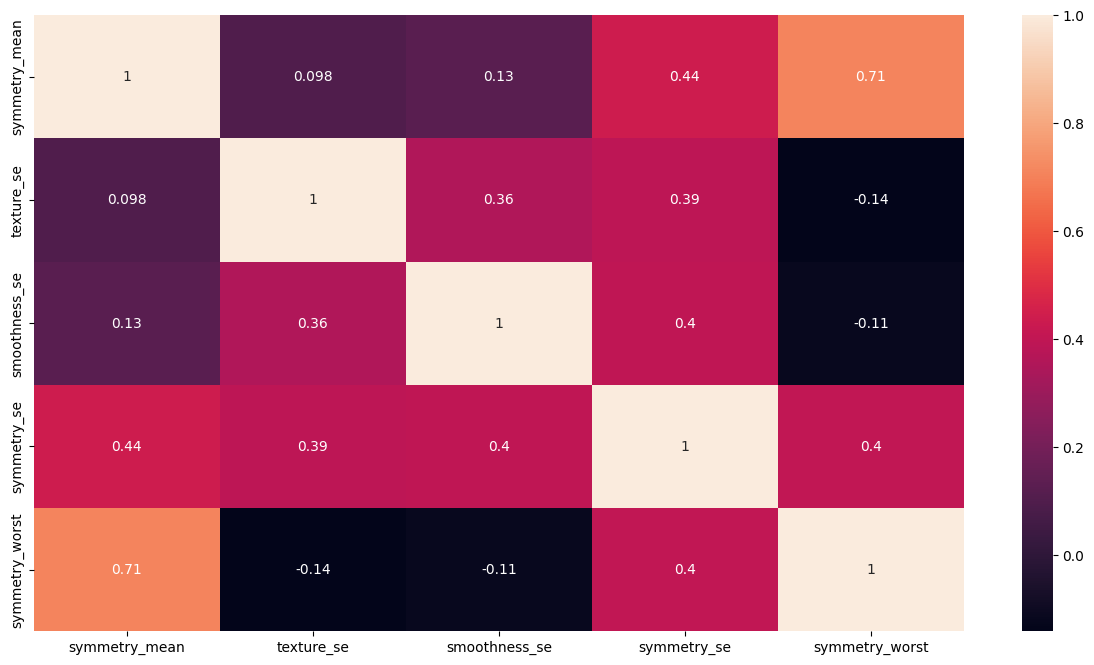

In [161]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr[features_colinealidad].loc[features_colinealidad], annot=True);

### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

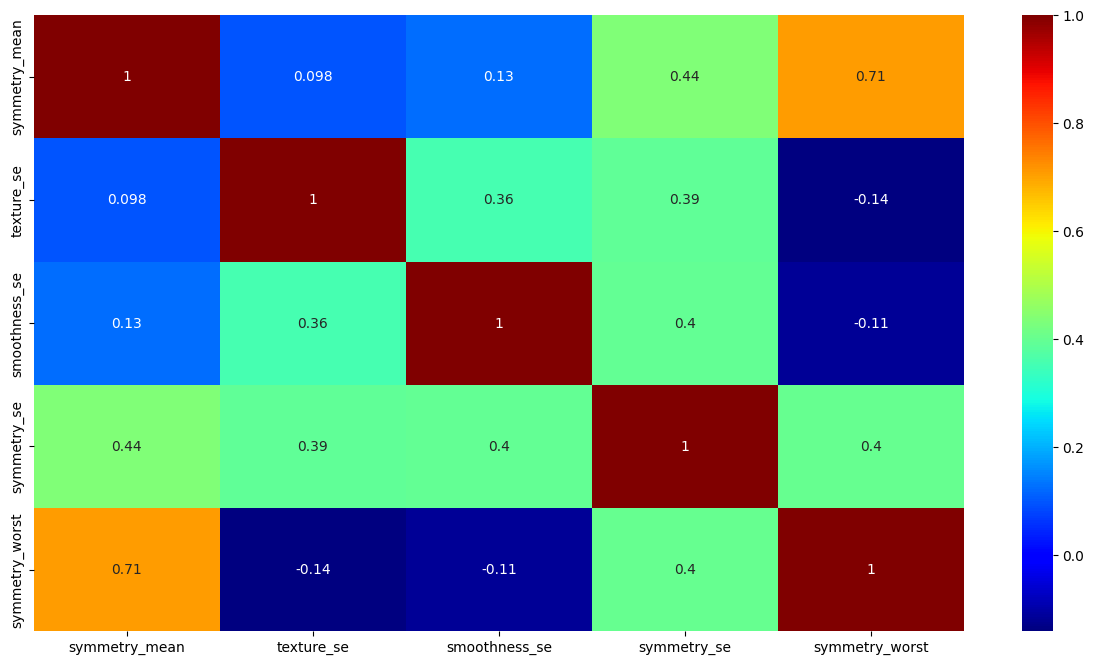

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr[features_colinealidad].loc[features_colinealidad], annot=True, cmap='jet');

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [169]:
x_train = train_set.drop(columns = target, axis = 1)
y_train = train_set[target]

x_test = test_set.drop(columns = target, axis = 1)
y_test = test_set[target]

In [177]:
rf_clf = RandomForestClassifier(random_state = 33)
rf_clf.fit(x_train[features_colinealidad], y_train)

RandomForestClassifier(random_state=33)

In [178]:
rf_clf.feature_importances_

array([0.21546459, 0.13793196, 0.15462836, 0.2193577 , 0.27261739])

In [179]:
rf_clf.feature_importances_[rf_clf.feature_importances_ > rf_clf.feature_importances_.mean()]

array([0.21546459, 0.2193577 , 0.27261739])

In [184]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(estimator = rf_clf, X = x_train[features_colinealidad], y=y_train, cv = 5, scoring = 'balanced_accuracy')
print(cv)
print('CV medio:', np.mean(cv))

[0.74059561 0.68266254 0.78276574 0.70897833 0.74148607]
CV medio: 0.7312976568287768


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(x_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())

print(np.mean(cross_val_score(rf_clf, X_train_kbest, y_train, cv = 5, scoring = "balanced_accuracy")))

0.940056969826373


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [199]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 33)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(x_train, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"]).sort_values("ranking")

[ 5  8  7  2 16 15  3  1 22 20 21 25 13  9 19 24 18 26 23 17  1  4  1  1
 10 11  6  1 12 14]


ranking
20        1
22        1
23        1
27        1
7         1
3         2
6         3
21        4
0         5
26        6
2         7
1         8
13        9
24       10
25       11
28       12
12       13
29       14
5        15
4        16
19       17
16       18
14       19
9        20
10       21
8        22
18       23
15       24
11       25
17       26

In [197]:
print(np.mean(cross_val_score(rf_RFE, x_train, y_train, cv = 5, scoring='balanced_accuracy')))

0.9560174176913794


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.